Aleksandra Sowa-Gilarowski Data 71200 Prof. Johanna Devaney Summer 2022

In [10]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# Loading "Go To College Dataset" from kaggle.com. The dataset can be found by clicking the link: 
# https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset
df = pd.read_csv('data.csv')

In [11]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [12]:
# Encoding categorical variables using Label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])

In [13]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,0,1
1,0,0,1,0,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


In [14]:
# The last column "in_college" will serve as my label.
# Splitting data and labels

y = df['in_college']
print(y)

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    0
Name: in_college, Length: 1000, dtype: int64


In [15]:
X = df.drop(['in_college'],axis=1)
print(X)

     type_school  school_accreditation  gender  interest  residence  \
0              0                     0       1         0          1   
1              0                     0       1         0          1   
2              0                     1       0         4          1   
3              1                     1       1         4          0   
4              0                     0       0         4          1   
..           ...                   ...     ...       ...        ...   
995            1                     0       0         4          0   
996            0                     1       0         0          0   
997            1                     0       1         0          1   
998            0                     1       1         3          0   
999            0                     1       1         2          1   

     parent_age  parent_salary  house_area  average_grades  \
0            56        6950000        83.0           84.09   
1            57        

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Scaling X data

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_trans = scaler.fit_transform(X)

# split data and labels into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, stratify = y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((800, 10), (800,), (200, 10), (200,))

In [20]:
df.shape

(1000, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   int32  
 1   school_accreditation   1000 non-null   int32  
 2   gender                 1000 non-null   int32  
 3   interest               1000 non-null   int32  
 4   residence              1000 non-null   int32  
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int64  
 10  in_college             1000 non-null   int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 66.5 KB


In [22]:
# Printing summary statistics for numerical columns
print(df.describe())

       type_school  school_accreditation       gender     interest  \
count  1000.000000           1000.000000  1000.000000  1000.000000   
mean      0.391000              0.519000     0.515000     2.365000   
std       0.488219              0.499889     0.500025     1.558269   
min       0.000000              0.000000     0.000000     0.000000   
25%       0.000000              0.000000     0.000000     1.000000   
50%       0.000000              1.000000     1.000000     3.000000   
75%       1.000000              1.000000     1.000000     4.000000   
max       1.000000              1.000000     1.000000     4.000000   

         residence   parent_age  parent_salary   house_area  average_grades  \
count  1000.000000  1000.000000   1.000000e+03  1000.000000     1000.000000   
mean      0.539000    52.208000   5.381570e+06    74.515300       86.097200   
std       0.498726     3.500427   1.397546e+06    15.293346        3.378738   
min       0.000000    40.000000   1.000000e+06    20.

In [23]:
# Checking for missing data in each column

print("Missing values in each column:")
df.isnull().sum()

# There are no missing values in the entire data set. 

Missing values in eacch column:


type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

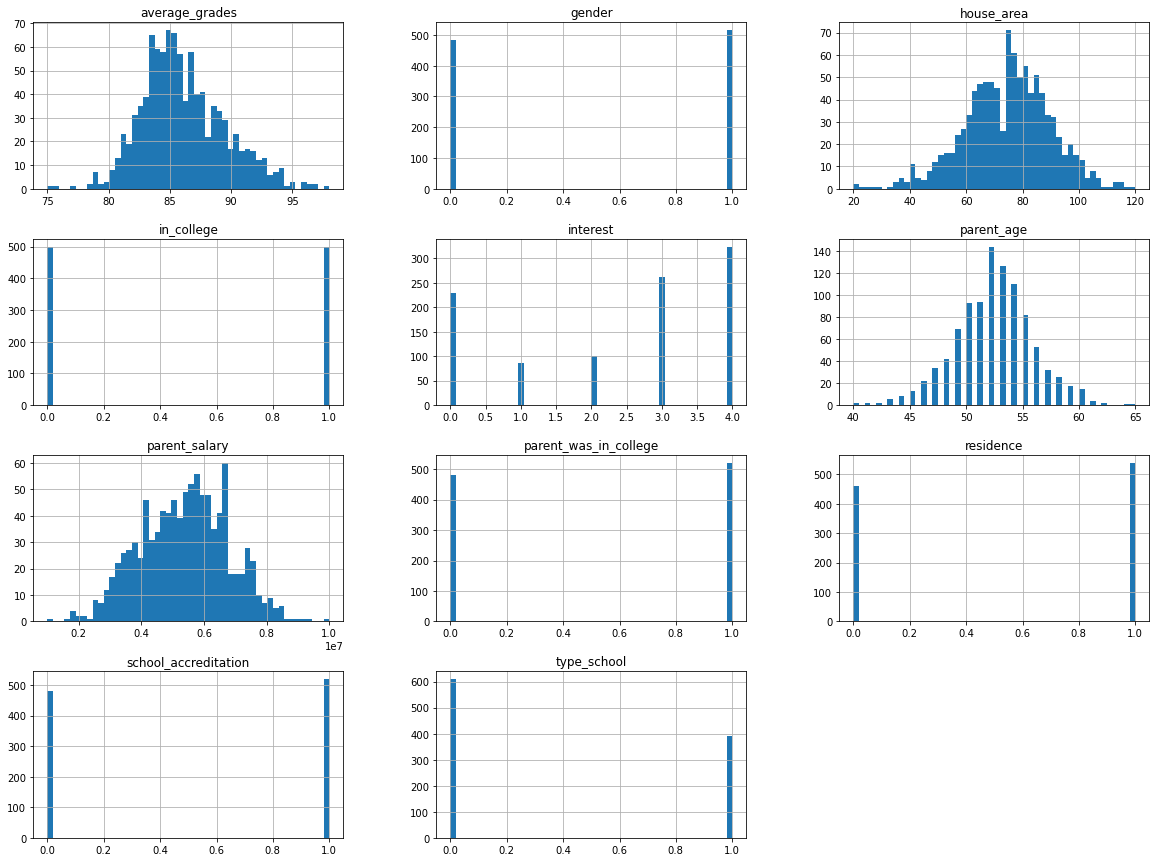

In [25]:
# Visualizations: Histograms
%matplotlib inline 
import matplotlib.pyplot as plt 
df_pd = pd.DataFrame(df)
df_pd.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0A529550>,
      dtype=object)

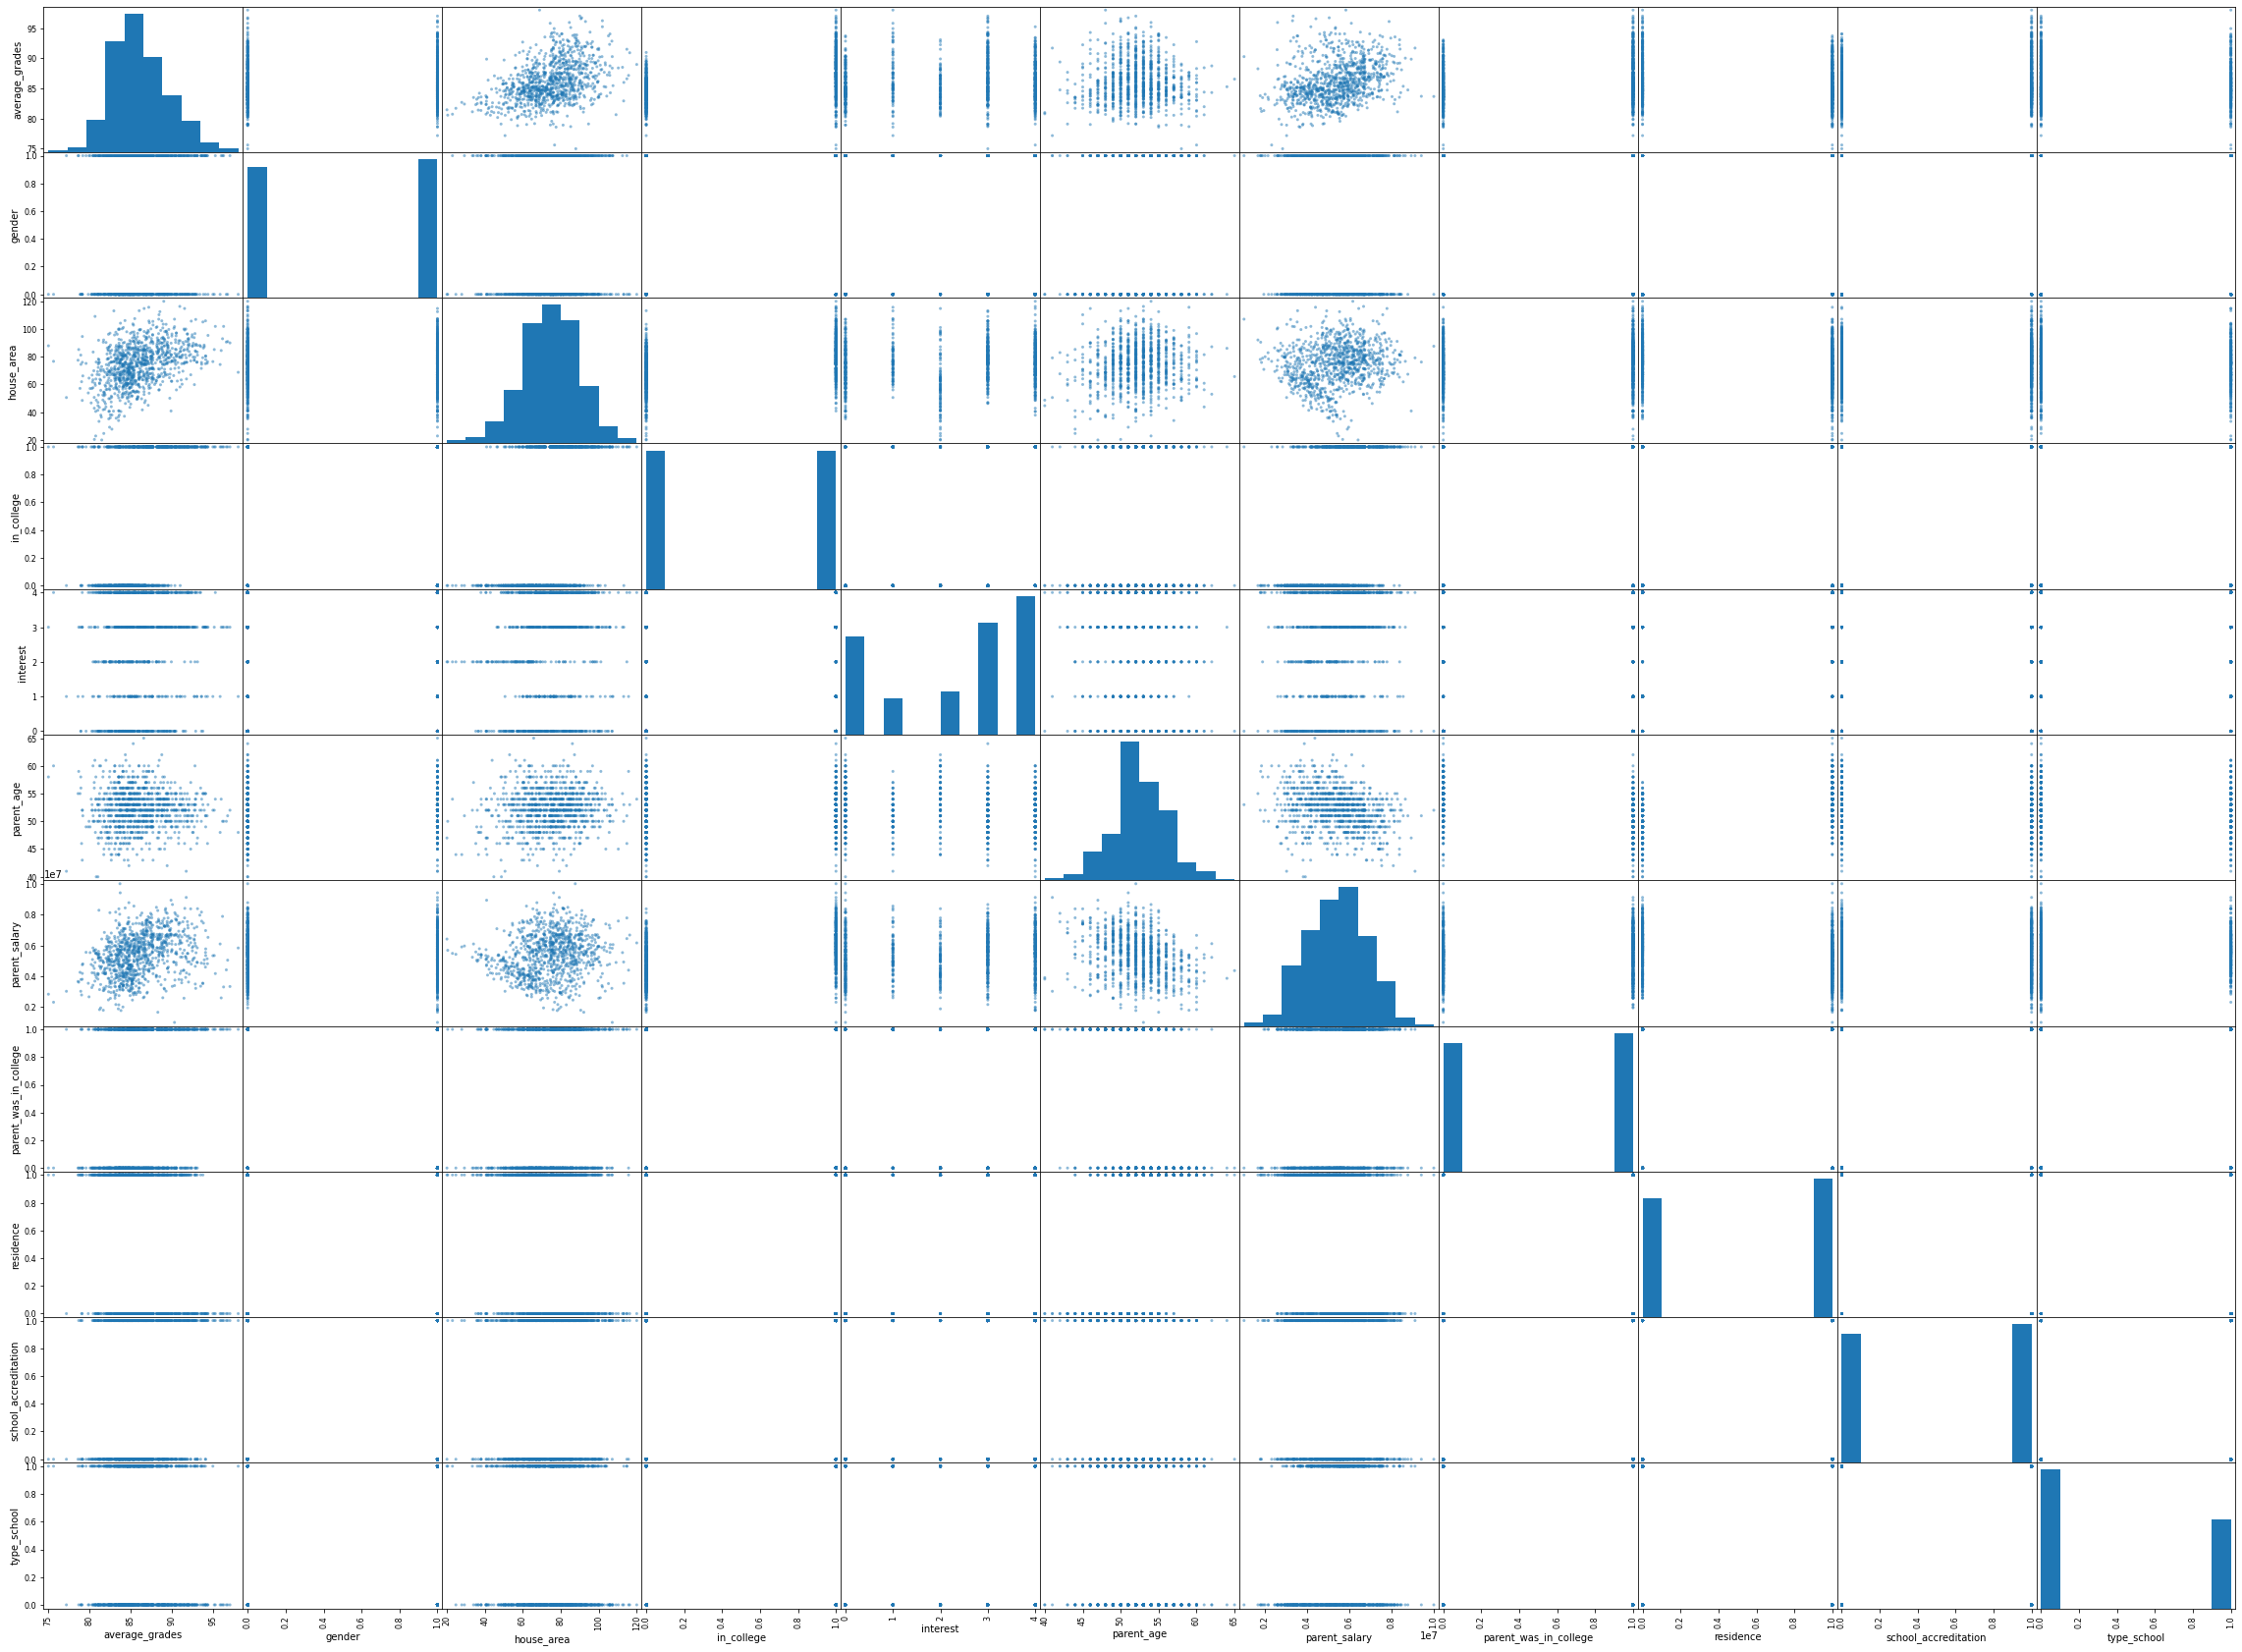

In [26]:
# Visualizations: Scatter Matrix

from pandas.plotting import scatter_matrix

attributes = ["average_grades", "gender", "house_area",
              "in_college", "interest", "parent_age", "parent_salary" , "parent_was_in_college" , "residence" , "school_accreditation" , "type_school"]
scatter_matrix(df_pd[attributes], figsize=(40, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0DEB02B0>,
      dtype=object)

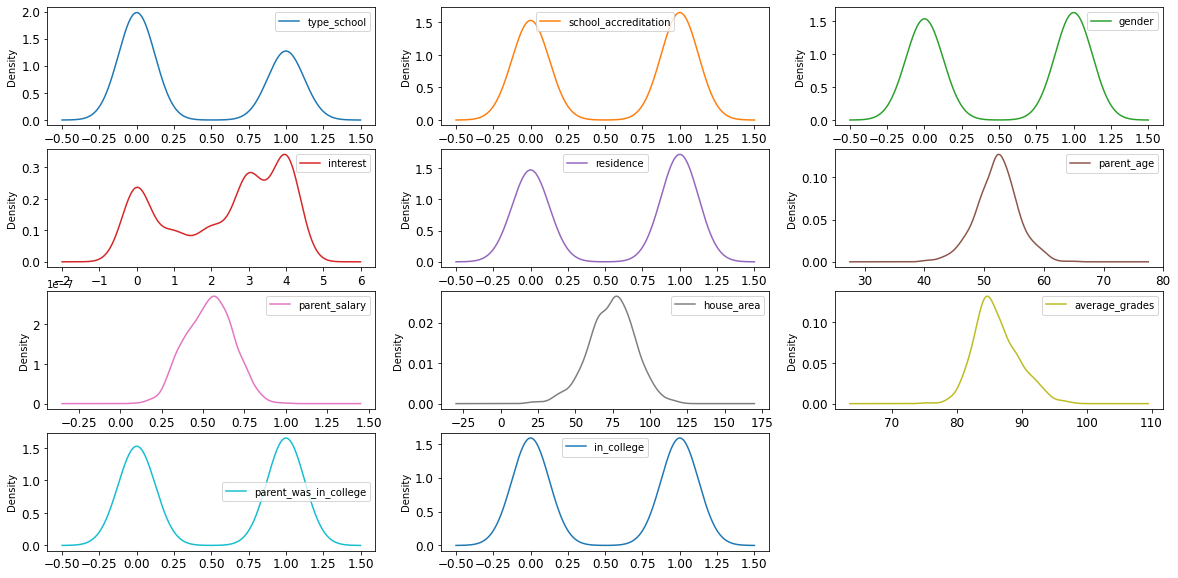

In [27]:
# Visualizations - density to check distribution

df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(20,10))

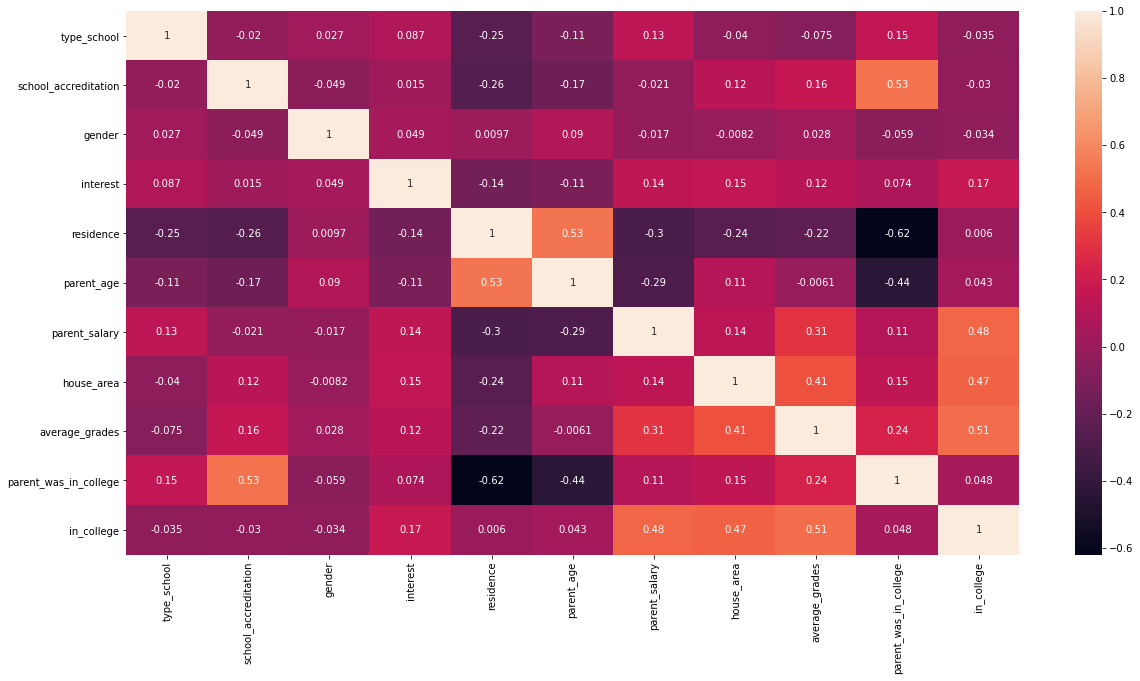

In [28]:
# Correlation Matrix
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0D1DCA60>,
      dtype=object)

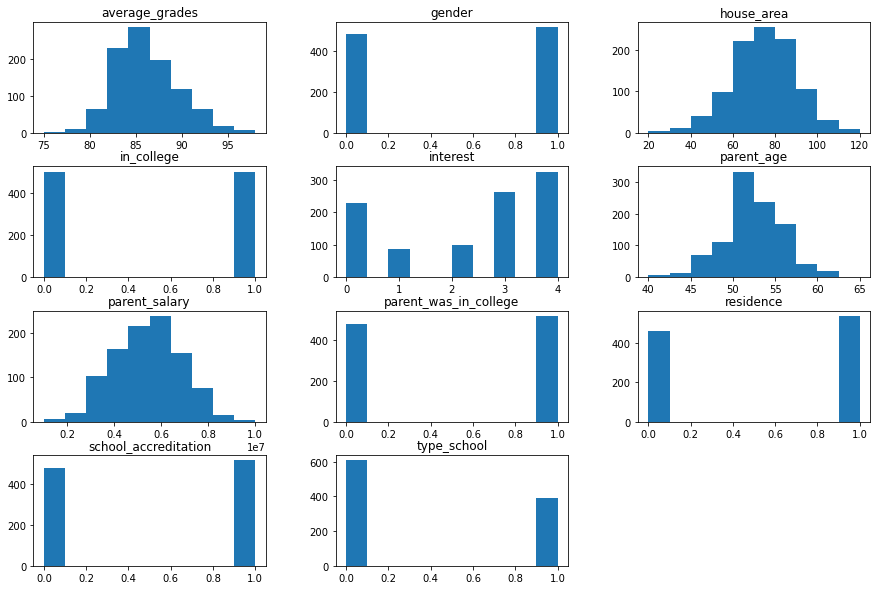

In [60]:
df.hist(bins=10, figsize=(15, 10),grid=False,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0D8AD8B0>,
      dtype=object)

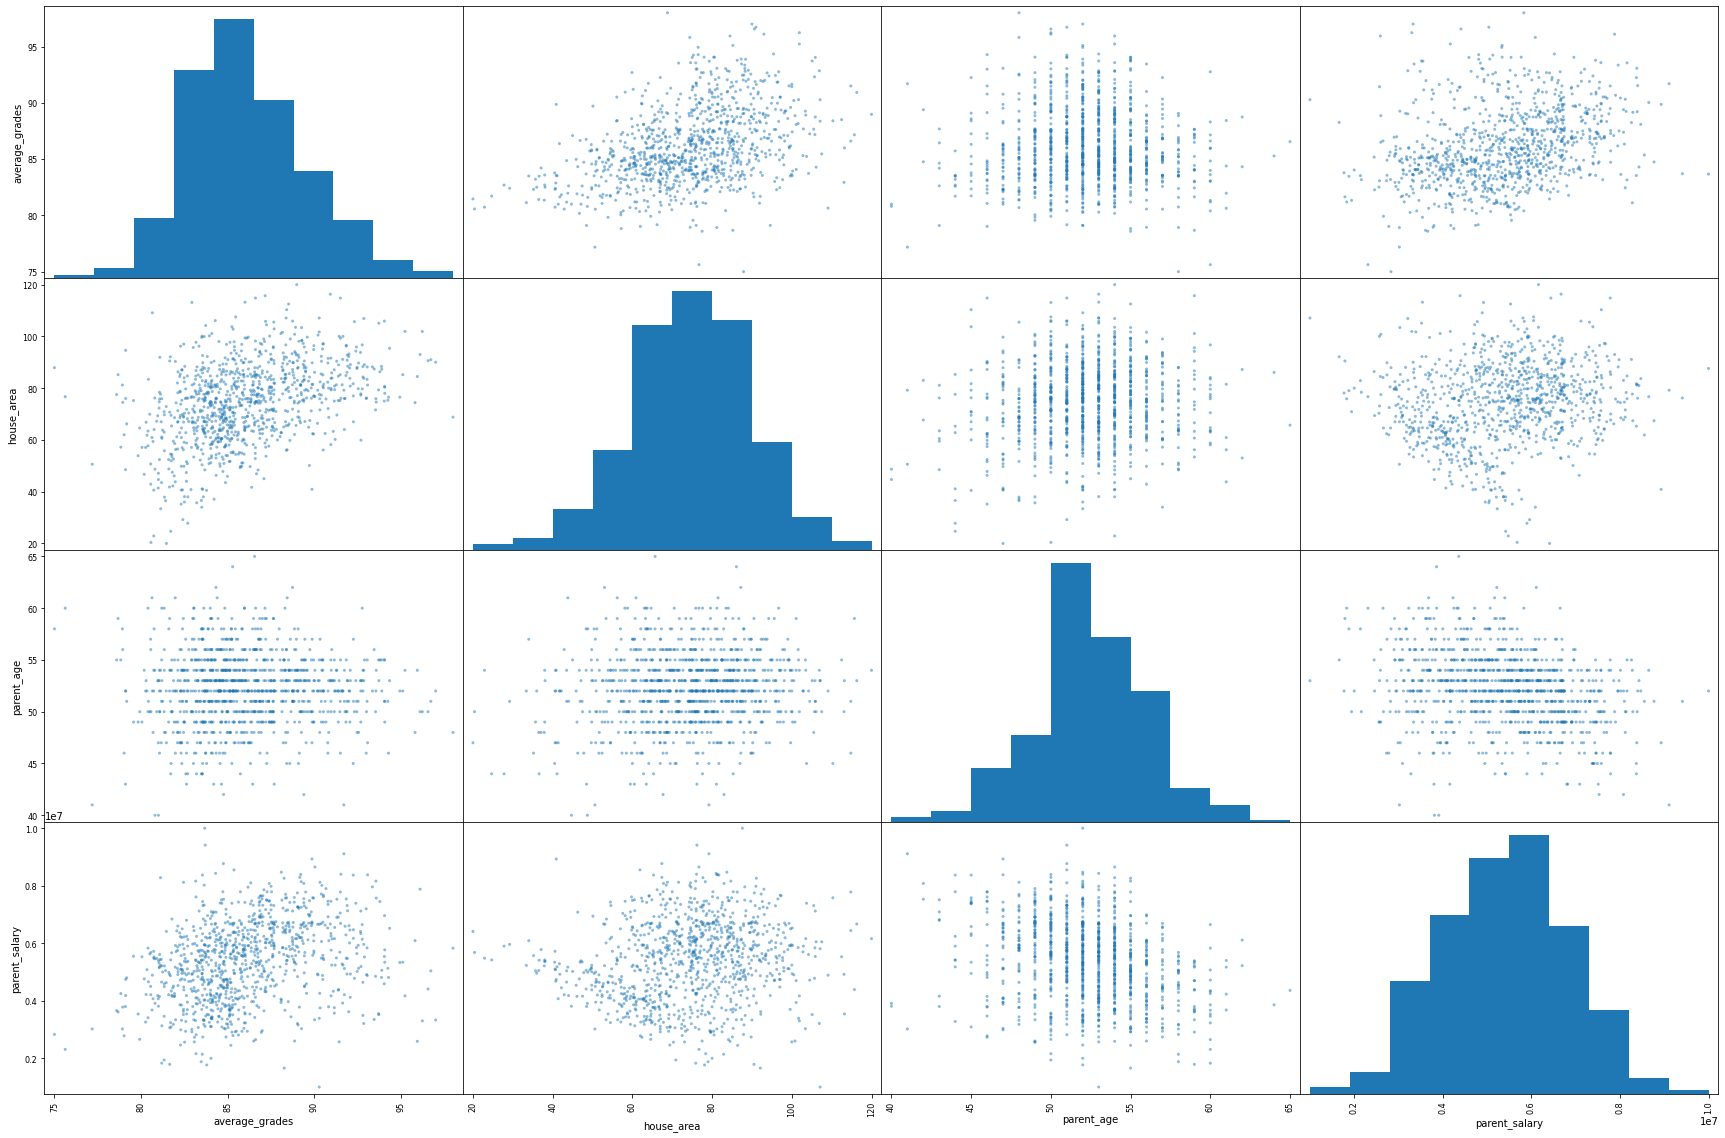

In [68]:
# Visualizations: Scatter Matrix for fewer number of attributes

from pandas.plotting import scatter_matrix

attributes_1 = ["average_grades", "house_area",
              "parent_age", "parent_salary"]
scatter_matrix(df_pd[attributes_1], figsize=(30, 20))

In [62]:
# Transformations:
# Applying binning to the average grades value in the Go To College dataset 
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(df['average_grades'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([75. , 77.3, 79.6, 81.9, 84.2, 86.5, 88.8, 91.1, 93.4, 95.7, 98. ])]


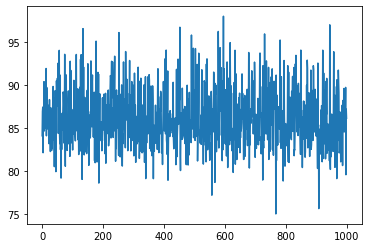

In [64]:
plt.plot(df['average_grades'].values.reshape(-1, 1))
plt.show()

In [63]:
binned = kb.transform(df['average_grades'].values.reshape(-1, 1))
binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

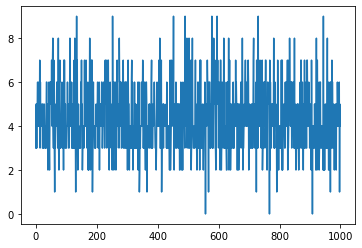

In [65]:
plt.plot(binned.argmax(1))
plt.show()

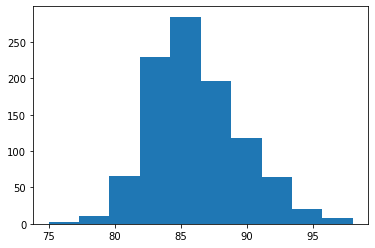

In [69]:
plt.hist(df['average_grades'].values.reshape(-1, 1), bins=10)
plt.show()

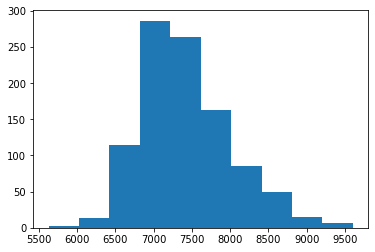

In [66]:
# Squaring (**2)
plt.hist(df['average_grades'].values.reshape(-1, 1)**2, bins=10)
plt.show()

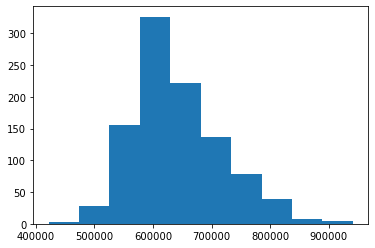

In [67]:
# Cubing
plt.hist(df['average_grades'].values.reshape(-1, 1)**3, bins=10)
plt.show()